In [1]:
import sys
sys.path.append('/home/v-runmao/projects/DomShift-ATMF')

from data import ATMFDataset, DomainSampler
import torch
from torch.utils.data import DataLoader
import numpy as np
import os
from tqdm.auto import tqdm

from helper import get_algorithm_from_root
import transformers

transformers.logging.set_verbosity_error()  # only report error

In [2]:
def analyze_experiment(exp_name):
    root = '/home/v-runmao/projects/DomShift-ATMF/pt/'
    for target in ['Amazon', 'Twitter', 'MSN', 'Finance']:
        discriminate(root, exp_name, target)

@torch.no_grad()
def discriminate(root, exp_name, target):
    prefix = f'search_{exp_name}_tgt_{target[0]}'
#     prefix = f'DANN_tgt_{target[0]}'
    algo = get_algorithm_from_root(os.path.join(root, exp_name), prefix)
    algo.eval()
    f = algo.model
    
    # get data set
    full = ATMFDataset('../data/data_root/preprocessed.csv', target[0])
    train_set = full.get_subset('train')
    loader = DataLoader(train_set, batch_size=16, num_workers=4, pin_memory=True, shuffle=False, drop_last=False)
    
    # results
    probs = []
    ds = []
    
    # loop
    for x, y, domain_ids in tqdm(loader):
        _ = f(x)
        disc_logits, _ = algo._discriminate(f.emb, domain_ids, y=y)
        disc_prob = torch.nn.functional.softmax(disc_logits, dim=1)
        probs.append(disc_prob.cpu().numpy())
        ds.append(domain_ids.cpu().numpy())
    
    # compute domain_acc, entropy, cross_entropy
    probs = np.concatenate(probs, axis=0)  # (N, 3)
    avg_probs = np.average(probs, axis=0)
    log_probs = np.log(probs)
    ds = np.concatenate(ds, axis=0)  # (N,)
    N = len(ds)
    acc = np.sum(ds == np.argmax(probs, axis=1)) / N
    entropy = -np.sum(probs * log_probs) / N
    ce = -np.average(log_probs)
    
    # print results
    print('=' * 80)
    print(f'Disc Acc: {acc}\nAvg Prob: {avg_probs}\nEntropy: {entropy}\nCross Entropy with Uniform: {ce}')

In [19]:
analyze_experiment('DANN_default')

  0%|          | 0/743 [00:00<?, ?it/s]

Disc Acc: 0.6773351301271793
Avg Prob: [0.5875309  0.28302896 0.12943876]
Entropy: 0.6887922406668492
Cross Entropy with Uniform: 1.6497249603271484


  0%|          | 0/710 [00:00<?, ?it/s]

Disc Acc: 0.5857268722466961
Avg Prob: [0.58084977 0.23979458 0.17935605]
Entropy: 0.9321915439151982
Cross Entropy with Uniform: 1.2719612121582031


  0%|          | 0/932 [00:00<?, ?it/s]

Disc Acc: 0.5894475397731087
Avg Prob: [0.39707896 0.4845573  0.118366  ]
Entropy: 0.8703030339581795
Cross Entropy with Uniform: 1.4068647623062134


  0%|          | 0/1044 [00:00<?, ?it/s]

Disc Acc: 0.6357865740463501
Avg Prob: [0.43631762 0.31145313 0.2522291 ]
Entropy: 0.9759030761572549
Cross Entropy with Uniform: 1.2534849643707275


## CDAN

In [4]:
analyze_experiment('CDAN_default')

  0%|          | 0/743 [00:00<?, ?it/s]

Disc Acc: 0.6722816474353576
Avg Prob: [0.6130334  0.24935578 0.13761176]
Entropy: 0.7122841083761475
Cross Entropy with Uniform: 1.583210825920105


  0%|          | 0/710 [00:00<?, ?it/s]

Disc Acc: 0.5636123348017621
Avg Prob: [0.5383009  0.32470274 0.13699411]
Entropy: 0.9443025536894273
Cross Entropy with Uniform: 1.2709723711013794


  0%|          | 0/932 [00:00<?, ?it/s]

Disc Acc: 0.5858226488554743
Avg Prob: [0.37066257 0.53326106 0.09607581]
Entropy: 0.8444501199906022
Cross Entropy with Uniform: 1.4220298528671265


  0%|          | 0/1044 [00:00<?, ?it/s]

Disc Acc: 0.5607521408467573
Avg Prob: [0.33117625 0.4399383  0.22888619]
Entropy: 0.9535862341120726
Cross Entropy with Uniform: 1.277261734008789


## RewDANN

In [13]:
analyze_experiment('RewDANN_default')

  0%|          | 0/743 [00:00<?, ?it/s]

Disc Acc: 0.6734607933967827
Entropy: 0.870611925429546
Cross Entropy with Uniform: 1.3643662929534912


  0%|          | 0/710 [00:00<?, ?it/s]

Disc Acc: 0.4768281938325991
Entropy: 1.0559787135187224
Cross Entropy with Uniform: 1.1414625644683838


  0%|          | 0/932 [00:00<?, ?it/s]

Disc Acc: 0.5823991407665973
Entropy: 0.9879248967913002
Cross Entropy with Uniform: 1.2183903455734253


  0%|          | 0/1044 [00:00<?, ?it/s]

Disc Acc: 0.5703335529073598
Entropy: 1.029982147134559
Cross Entropy with Uniform: 1.1752365827560425


## UniRewDANN

In [16]:
analyze_experiment('UniRewDANN_default')

  0%|          | 0/743 [00:00<?, ?it/s]

Disc Acc: 0.6744714899351469
Avg Prob: [0.4359684  0.29763386 0.26639837]
Entropy: 0.9426075213983408
Cross Entropy with Uniform: 1.2617679834365845


  0%|          | 0/710 [00:00<?, ?it/s]

Disc Acc: 0.6062555066079295
Avg Prob: [0.40777236 0.27506906 0.3171581 ]
Entropy: 1.0582392621145373
Cross Entropy with Uniform: 1.139184832572937


  0%|          | 0/932 [00:00<?, ?it/s]

Disc Acc: 0.5856883936363027
Avg Prob: [0.40813366 0.37211734 0.21974647]
Entropy: 0.9945358519122978
Cross Entropy with Uniform: 1.2118396759033203


  0%|          | 0/1044 [00:00<?, ?it/s]

Disc Acc: 0.5305108090304809
Avg Prob: [0.3962334  0.32872552 0.2750397 ]
Entropy: 1.0200040047308223
Cross Entropy with Uniform: 1.188497543334961


## BlcDANN

In [3]:
analyze_experiment('BlcDANN_default')

  0%|          | 0/743 [00:00<?, ?it/s]

Disc Acc: 0.6723658721468879
Avg Prob: [0.33456126 0.32814065 0.33729798]
Entropy: 1.0015443390465764
Cross Entropy with Uniform: 1.2129878997802734


  0%|          | 0/710 [00:00<?, ?it/s]

Disc Acc: 0.47726872246696034
Avg Prob: [0.353768   0.3195573  0.32667524]
Entropy: 1.0666463036894274
Cross Entropy with Uniform: 1.1307504177093506


  0%|          | 0/932 [00:00<?, ?it/s]

Disc Acc: 0.44968785661542593
Avg Prob: [0.3401717  0.3600754  0.29975405]
Entropy: 1.0286093414361952
Cross Entropy with Uniform: 1.1752594709396362


  0%|          | 0/1044 [00:00<?, ?it/s]

Disc Acc: 0.6014132582789389
Avg Prob: [0.35894424 0.3498385  0.2912142 ]
Entropy: 0.977891347816486
Cross Entropy with Uniform: 1.2351363897323608


# Target: Twitter

In [2]:
dann = get_algorithm_from_root(f'DANN_tgt_T')
dann.eval()
f, g = dann.model, dann.disc

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [3]:
full = ATMFDataset('../data/data_root/preprocessed.csv', 'T')
train_set = full.get_subset('train')
sampler = DomainSampler(full.domain_ids[train_set.indices],
                        16,
                        align='truncation')
loader = DataLoader(train_set, batch_sampler=sampler, num_workers=4, pin_memory=True)

In [5]:
for i, (x, y, domain_ids) in enumerate(loader):
    if i >= 10:
        break
    with torch.no_grad():
        out = f(x)
        emb = f.emb
        disc_out = g(emb)
        disc_prob = torch.nn.functional.softmax(disc_out, dim=1)
        print(disc_prob.cpu())
        print(domain_ids)

tensor([[0.4165, 0.4184, 0.1651],
        [0.6419, 0.2294, 0.1287],
        [0.4331, 0.3683, 0.1985],
        [0.7036, 0.1861, 0.1103],
        [0.4492, 0.3523, 0.1985],
        [0.4326, 0.3963, 0.1711],
        [0.4318, 0.3843, 0.1839],
        [0.4408, 0.3885, 0.1707],
        [0.6414, 0.2023, 0.1563],
        [0.4346, 0.3733, 0.1922],
        [0.4432, 0.3697, 0.1871],
        [0.4366, 0.3899, 0.1735],
        [0.6981, 0.1863, 0.1156],
        [0.4267, 0.3796, 0.1937],
        [0.4412, 0.3697, 0.1891],
        [0.4385, 0.3771, 0.1844],
        [0.4079, 0.3972, 0.1948],
        [0.6148, 0.2366, 0.1486],
        [0.6455, 0.2192, 0.1353],
        [0.4226, 0.3895, 0.1879],
        [0.3879, 0.4539, 0.1582],
        [0.3749, 0.4471, 0.1780],
        [0.6833, 0.1877, 0.1289],
        [0.4208, 0.3945, 0.1847],
        [0.4132, 0.4041, 0.1826],
        [0.6247, 0.2295, 0.1458],
        [0.4128, 0.4066, 0.1806],
        [0.4092, 0.4027, 0.1882],
        [0.4126, 0.4060, 0.1814],
        [0.662

tensor([[0.4355, 0.4307, 0.1339],
        [0.6869, 0.2020, 0.1111],
        [0.6921, 0.1897, 0.1181],
        [0.6813, 0.2002, 0.1185],
        [0.4261, 0.3794, 0.1945],
        [0.4387, 0.3689, 0.1924],
        [0.6790, 0.2058, 0.1153],
        [0.7003, 0.1819, 0.1178],
        [0.6653, 0.2126, 0.1221],
        [0.6697, 0.2081, 0.1222],
        [0.4427, 0.3667, 0.1906],
        [0.4309, 0.3689, 0.2002],
        [0.7015, 0.1951, 0.1034],
        [0.4310, 0.3809, 0.1882],
        [0.4338, 0.3797, 0.1864],
        [0.6532, 0.2158, 0.1310],
        [0.6189, 0.2357, 0.1454],
        [0.4141, 0.4016, 0.1844],
        [0.4192, 0.4024, 0.1784],
        [0.4174, 0.3890, 0.1937],
        [0.6893, 0.1789, 0.1318],
        [0.6296, 0.2296, 0.1409],
        [0.4151, 0.4093, 0.1757],
        [0.4161, 0.3900, 0.1939],
        [0.4143, 0.3930, 0.1927],
        [0.4199, 0.4117, 0.1684],
        [0.3973, 0.4353, 0.1673],
        [0.4277, 0.3788, 0.1935],
        [0.2848, 0.6307, 0.0846],
        [0.404

# Target: Amazon

In [2]:
dann = get_algorithm_from_root(f'DANN_tgt_A')
dann.eval()
f, g = dann.model, dann.disc
full = ATMFDataset('../data/data_root/preprocessed.csv', 'A')
train_set = full.get_subset('train')
sampler = DomainSampler(full.domain_ids[train_set.indices],
                        16,
                        align='truncation')
loader = DataLoader(train_set, batch_sampler=sampler, num_workers=4, pin_memory=True)
for i, (x, y, domain_ids) in enumerate(loader):
    if i >= 10:
        break
    with torch.no_grad():
        out = f(x)
        emb = f.emb
        disc_out = g(emb)
        disc_prob = torch.nn.functional.softmax(disc_out, dim=1)
        print(disc_prob.cpu())
        print(domain_ids)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

tensor([[0.9033, 0.0457, 0.0510],
        [0.9566, 0.0192, 0.0242],
        [0.1599, 0.5756, 0.2644],
        [0.9400, 0.0352, 0.0249],
        [0.3830, 0.4928, 0.1242],
        [0.9164, 0.0490, 0.0346],
        [0.8015, 0.1376, 0.0608],
        [0.6167, 0.2928, 0.0905],
        [0.8282, 0.1160, 0.0558],
        [0.8855, 0.0726, 0.0419],
        [0.8740, 0.0811, 0.0449],
        [0.1367, 0.5942, 0.2690],
        [0.9131, 0.0378, 0.0491],
        [0.8040, 0.1417, 0.0543],
        [0.8906, 0.0528, 0.0566],
        [0.2706, 0.5583, 0.1711],
        [0.1759, 0.5497, 0.2744],
        [0.1563, 0.5491, 0.2946],
        [0.1761, 0.5287, 0.2952],
        [0.7374, 0.2024, 0.0602],
        [0.1572, 0.5473, 0.2955],
        [0.6114, 0.3204, 0.0682],
        [0.2207, 0.5459, 0.2334],
        [0.7573, 0.1826, 0.0601],
        [0.8101, 0.1436, 0.0463],
        [0.7439, 0.1900, 0.0662],
        [0.2450, 0.5411, 0.2139],
        [0.1554, 0.5377, 0.3068],
        [0.2125, 0.5273, 0.2602],
        [0.181

tensor([[0.4232, 0.4706, 0.1062],
        [0.4781, 0.4230, 0.0989],
        [0.9044, 0.0438, 0.0518],
        [0.9009, 0.0613, 0.0378],
        [0.9181, 0.0385, 0.0434],
        [0.1623, 0.5718, 0.2659],
        [0.4282, 0.4639, 0.1079],
        [0.8973, 0.0493, 0.0533],
        [0.8969, 0.0606, 0.0425],
        [0.9120, 0.0562, 0.0318],
        [0.9564, 0.0220, 0.0216],
        [0.8506, 0.0908, 0.0586],
        [0.1390, 0.5852, 0.2758],
        [0.8852, 0.0678, 0.0469],
        [0.8641, 0.0781, 0.0578],
        [0.7375, 0.2012, 0.0613],
        [0.1956, 0.5165, 0.2879],
        [0.2152, 0.5463, 0.2385],
        [0.1708, 0.5317, 0.2975],
        [0.2118, 0.5260, 0.2621],
        [0.8334, 0.1233, 0.0433],
        [0.1837, 0.5323, 0.2840],
        [0.6989, 0.2329, 0.0682],
        [0.7145, 0.2250, 0.0605],
        [0.5995, 0.3133, 0.0872],
        [0.3004, 0.5132, 0.1864],
        [0.2631, 0.5491, 0.1878],
        [0.6463, 0.2786, 0.0751],
        [0.1653, 0.5314, 0.3033],
        [0.243

# ppt

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
m1 = [-10, 10]
m2 = [10, -10]
cov = [[10, 2],  [2, 10]]

In [3]:
x1 = np.random.multivariate_normal(m1, cov, 500).T
c1 = ['red' if y - x >= 20 else 'green' for x, y in x1.T]

In [9]:
x2 = np.random.multivariate_normal(m2, cov, 500).T
c2 = ['blue' if y - x >= -20 else 'purple' for x, y in x2.T]

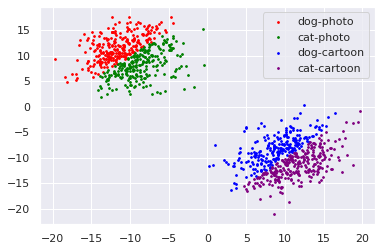

In [11]:
fig, ax = plt.subplots()

x = np.concatenate((x1, x2), axis=1)
c = np.array(c1 + c2)

for color, label in zip(['red', 'green','blue', 'purple'], ['dog-photo', 'cat-photo', 'dog-cartoon', 'cat-cartoon']):
    mask = c == color
    ax.scatter(x[0, mask], x[1, mask], c=color, s=3, label=label)

ax.legend()
plt.show()

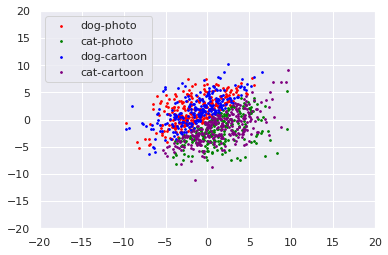

In [13]:
fig, ax = plt.subplots()

x = np.concatenate((x1, x2), axis=1)
c = np.array(c1 + c2)

for color, label in zip(['red', 'green','blue', 'purple'], ['dog-photo', 'cat-photo', 'dog-cartoon', 'cat-cartoon']):
    mask = c == color
    if color in ['red', 'green']:
        s1, s2 = 10, -10
    else:
        s1, s2 = -10, 10
    ax.scatter(x[0, mask] + s1, x[1, mask] + s2, c=color, s=3, label=label)

ax.legend()
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.show()